In [1]:
import warnings

warnings.filterwarnings("ignore")

import sys
import os

# 配置搜索路径
sys.path.append("./")
sys.path.append("../")
sys.path.append("../../")
import backtrader as bt
import pandas as pd
import numpy as np
import sqlite3
from Share.database.downloader.downloader_base import DownloaderBase
import Share.database.database_config as db_config

In [2]:
BACKTEST_INDEX_SYMBOLS = "000016"  # 【选股】策略的对比基准=指数index，【择时】策略的对比基准=单股自身
# ---- 回归任务
model_pred_df = pd.read_pickle(f'./backtest_data/test/{BACKTEST_INDEX_SYMBOLS}_20190101_回归任务_v2.pkl')

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_close_label(df, label_name='label'):
    # 设置图像的大小
    plt.figure(figsize=(14, 7))
    # 绘制收盘价曲线
    plt.plot(df['datetime'], df['close'], label='Close Price', color='blue')
    # 提取买入和卖出点
    buy_points = df[df[label_name] == 1]
    sell_points = df[df[label_name] == -1]
    # 在买入点绘制上升三角形标记
    plt.scatter(buy_points['datetime'], buy_points['close'], label='Buy', color='green', marker='^', alpha=1)
    # 在卖出点绘制下降三角形标记
    plt.scatter(sell_points['datetime'], sell_points['close'], label='Sell', color='red', marker='v', alpha=1)
    # 增加标题和标签
    plt.title('Stock Price with Buy and Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    # 显示图例
    plt.legend()
    # 展示图形
    plt.show()

def mark_signals(group):
    top3 = group.nlargest(3, 'label_pred')  # 获取标签预测排名Top 3
    bottom3 = group.nsmallest(3, 'label_pred')  # 获取标签预测排名Bottom 3
    group.loc[top3.index, 'signal'] = 1  # 标记买入点
    group.loc[bottom3.index, 'signal'] = -1  # 标记卖出点
    return group
df = model_pred_df.copy()
df['signal'] = 0
df = df.groupby('datetime').apply(mark_signals)

db_conn = sqlite3.connect("../../Share/database/hh_quant.db")
db_downloader = DownloaderBase(db_conn=db_conn, db_config=db_config)

In [17]:
df[['stock_code', 'stock_name']].drop_duplicates().to_dict('records')

[{'stock_code': '688111', 'stock_name': '金山办公'},
 {'stock_code': '688599', 'stock_name': '天合光能'},
 {'stock_code': '688981', 'stock_name': '中芯国际'},
 {'stock_code': '600905', 'stock_name': '三峡能源'},
 {'stock_code': '601728', 'stock_name': '中国电信'},
 {'stock_code': '688041', 'stock_name': '海光信息'},
 {'stock_code': '603501', 'stock_name': '韦尔股份'},
 {'stock_code': '603259', 'stock_name': '药明康德'},
 {'stock_code': '603986', 'stock_name': '兆易创新'},
 {'stock_code': '603799', 'stock_name': '华友钴业'},
 {'stock_code': '601988', 'stock_name': '中国银行'},
 {'stock_code': '600887', 'stock_name': '伊利股份'},
 {'stock_code': '600050', 'stock_name': '中国联通'},
 {'stock_code': '600150', 'stock_name': '中国船舶'},
 {'stock_code': '601398', 'stock_name': '工商银行'},
 {'stock_code': '601390', 'stock_name': '中国中铁'},
 {'stock_code': '600036', 'stock_name': '招商银行'},
 {'stock_code': '601318', 'stock_name': '中国平安'},
 {'stock_code': '601899', 'stock_name': '紫金矿业'},
 {'stock_code': '601288', 'stock_name': '农业银行'},
 {'stock_code': '601

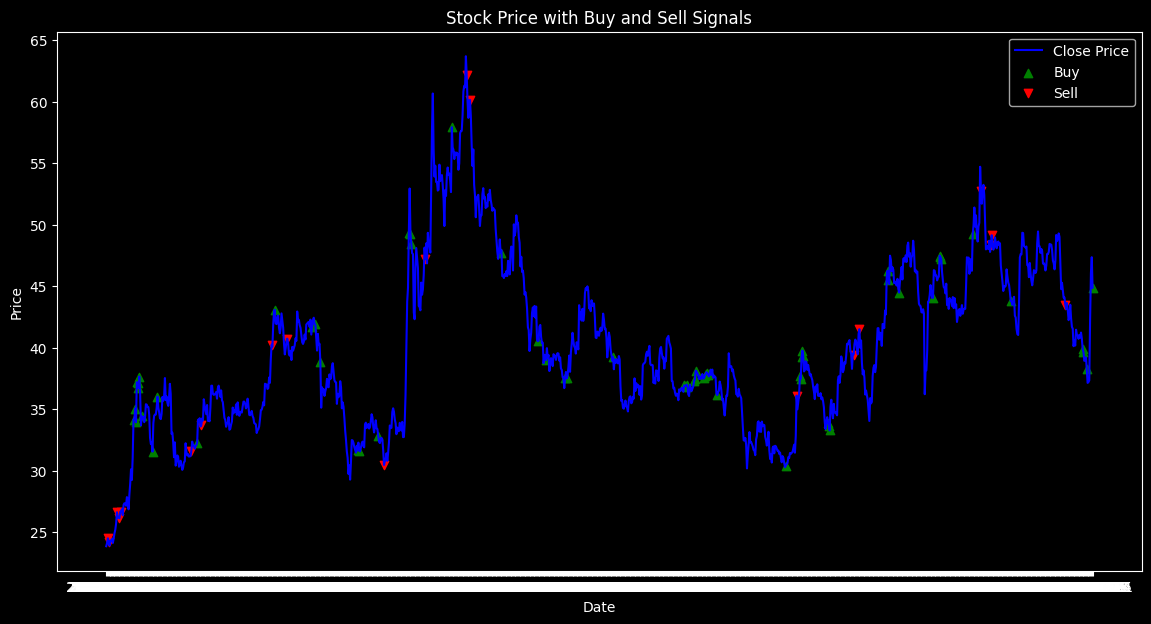

In [18]:
sample_stock_code = '601628'
sample_pred = df[df['stock_code'] == sample_stock_code]
sample_history = db_downloader._download_stock_history_info(sample_stock_code, '20190101', '20231231')
sample_merge = sample_pred.merge(sample_history, on=['stock_code', 'datetime'])

plot_close_label(sample_merge, 'signal')

[1, 2, 3]